<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-problem" data-toc-modified-id="The-problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The problem</a></span></li><li><span><a href="#Data-exporation" data-toc-modified-id="Data-exporation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data exporation</a></span></li><li><span><a href="#The-linear-model" data-toc-modified-id="The-linear-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The linear model</a></span><ul class="toc-item"><li><span><a href="#Understanding-the-model-error-as-a-function-of-parameters-m-and-n" data-toc-modified-id="Understanding-the-model-error-as-a-function-of-parameters-m-and-n-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Understanding the model error as a function of parameters <code>m</code> and <code>n</code></a></span></li></ul></li><li><span><a href="#The-optimal-linear-model" data-toc-modified-id="The-optimal-linear-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>The optimal linear model</a></span><ul class="toc-item"><li><span><a href="#Understanding-lr-attributes-/-methods" data-toc-modified-id="Understanding-lr-attributes-/-methods-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Understanding lr attributes / methods</a></span></li></ul></li><li><span><a href="#Align-with-business-to-decide-the-optimal-metric!!" data-toc-modified-id="Align-with-business-to-decide-the-optimal-metric!!-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Align with business to decide the optimal metric!!</a></span></li></ul></div>

# Linear regression motivation

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## The problem

In [2]:
data = pd.read_csv("../datasets/hours_vs_mark.csv", index_col=0)

We have 100 students, and we know:
 * how many hours they studied for their exam
 * what mark they got (0 to 100)

In [3]:
data.shape

(100, 2)

In [6]:
data.sample(10)

,hours,mark
92,48,22
57,193,30
7,861,73
82,159,37
83,84,0
71,53,8
70,756,87
81,491,37
96,49,21
98,310,46


In [11]:
data.corr()

,hours,mark
hours,1.000000,0.867072
mark,0.867072,1.000000


We would like to understand the relationship $$mark = f(hours)$$

So that we can **predict the expected mark** we will get by studying a given number of hours

## Data exporation

<AxesSubplot:xlabel='hours', ylabel='Count'>

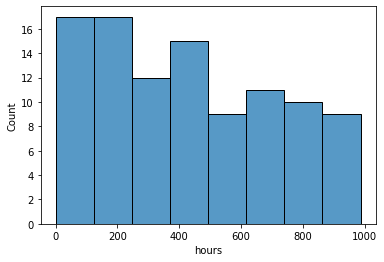

In [8]:
sns.histplot(data.hours)

<AxesSubplot:xlabel='mark', ylabel='Count'>

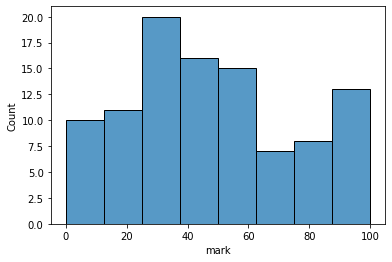

In [9]:
sns.histplot(data.mark)

<AxesSubplot:xlabel='hours', ylabel='mark'>

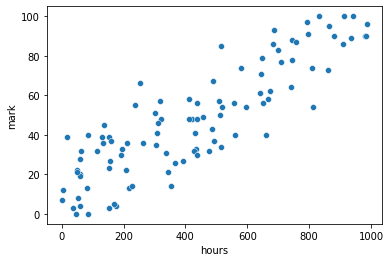

In [10]:
sns.scatterplot(x=data["hours"], y=data["mark"])

## The linear model

Lets try a linear regression $$Y = m * X + n$$

$m$ is the slope  
$n$ is the value of $Y$ when $X=0$ 

$$mark = m * hours + n$$

We want to find $m$ and $n$ that *best* model our data

Lets guess:

$$mark = 0.1 * hours$$

$$mark_2 =0.08 * hours + 10$$

Which model performs better?

In [13]:
data.shape

(100, 2)

In [14]:
data.head()

,hours,mark
0,865,95
1,4,12
2,305,35
3,437,56
4,682,86


In [15]:
data["prediction_1"] = 0.1 * data.hours

In [16]:
data["prediction_2"] = 0.08 * data.hours + 10

In [17]:
data.head(10)

,hours,mark,prediction_1,prediction_2
0,865,95,86.5,79.20
1,4,12,0.4,10.32
2,305,35,30.5,34.40
3,437,56,43.7,44.96
4,682,86,68.2,64.56
5,560,40,56.0,54.80
6,367,26,36.7,39.36
7,861,73,86.1,78.88
8,59,20,5.9,14.72
9,514,85,51.4,51.12


In [18]:
# semi-random prediction
data["prediction_3"] = np.random.uniform(40, 60, size=data.shape[0]).round(2)

In [19]:
data.head(10)

,hours,mark,prediction_1,prediction_2,prediction_3
0,865,95,86.5,79.20,42.81
1,4,12,0.4,10.32,46.84
2,305,35,30.5,34.40,48.68
3,437,56,43.7,44.96,45.07
4,682,86,68.2,64.56,42.50
5,560,40,56.0,54.80,47.82
6,367,26,36.7,39.36,53.13
7,861,73,86.1,78.88,45.29
8,59,20,5.9,14.72,42.87
9,514,85,51.4,51.12,51.61


Lets measure error of both models

Lets compute **Mean squared error**, which:
 - Turns every deviation positive (square power)
 - Penalizes specially big deviations (deviation of 3 is 9 times worse than deviation of 1)

In [20]:
data['error_1'] = (data.mark - data.prediction_1) ** 2

In [21]:
data['error_2'] = (data.mark - data.prediction_2)  ** 2

In [22]:
data['error_3'] = (data.mark - data.prediction_3) ** 2

In [23]:
data.head(10)

,hours,mark,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3
0,865,95,86.5,79.20,42.81,72.25,249.6400,2723.7961
1,4,12,0.4,10.32,46.84,134.56,2.8224,1213.8256
2,305,35,30.5,34.40,48.68,20.25,0.3600,187.1424
3,437,56,43.7,44.96,45.07,151.29,121.8816,119.4649
4,682,86,68.2,64.56,42.50,316.84,459.6736,1892.2500
5,560,40,56.0,54.80,47.82,256.00,219.0400,61.1524
6,367,26,36.7,39.36,53.13,114.49,178.4896,736.0369
7,861,73,86.1,78.88,45.29,171.61,34.5744,767.8441
8,59,20,5.9,14.72,42.87,198.81,27.8784,523.0369
9,514,85,51.4,51.12,51.61,1128.96,1147.8544,1114.8921


In [24]:
data.error_1.mean()

234.8416

In [25]:
data.error_2.mean()

204.23206400000004

In [26]:
data.error_3.mean()

792.5492849999999

Considering Mean Squared Error criteria, model 2 performs better!

Lets for a moment consider another criteria:   If pred and real distance is less than 5, good. Otherwise, bad

In [27]:
data["error_1_bis"] = (data.mark - data.prediction_1).abs() < 5

In [28]:
data["error_2_bis"] = (data.mark - data.prediction_2).abs() < 5

In [30]:
data["error_3_bis"] = (data.mark - data.prediction_3).abs() < 5

In [31]:
data.head()

,hours,mark,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3,error_1_bis,error_2_bis,error_3_bis
0,865,95,86.5,79.20,42.81,72.25,249.6400,2723.7961,False,False,False
1,4,12,0.4,10.32,46.84,134.56,2.8224,1213.8256,False,True,False
2,305,35,30.5,34.40,48.68,20.25,0.3600,187.1424,True,True,False
3,437,56,43.7,44.96,45.07,151.29,121.8816,119.4649,False,False,False
4,682,86,68.2,64.56,42.50,316.84,459.6736,1892.2500,False,False,False


In [32]:
data.error_1_bis.sum()

20

In [33]:
data.error_2_bis.sum()

25

This alternative metric would choose also model 2

Lets plot our models

$$mark = 0.1 * hours$$

$$mark_2 =0.08 * hours + 10$$

In [34]:
%matplotlib notebook

<IPython.core.display.Javascript object>


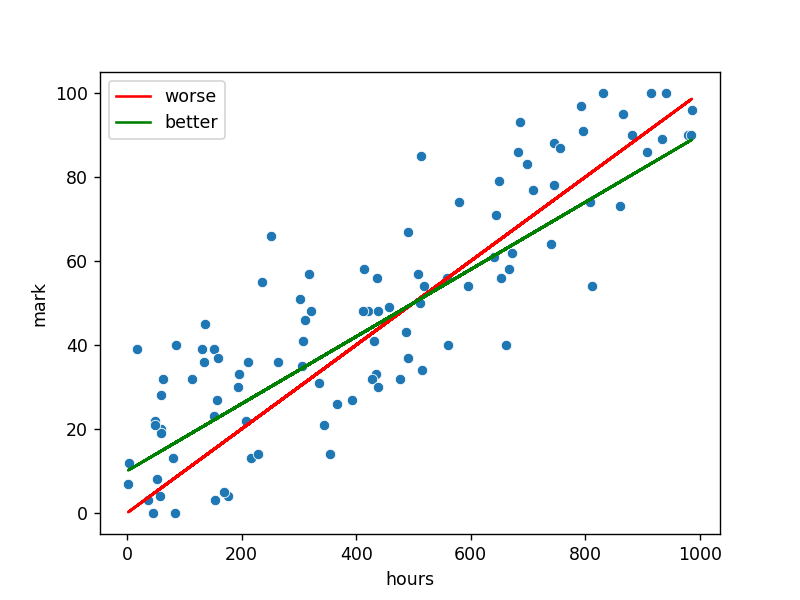

In [35]:
fig, ax = plt.subplots()
sns.scatterplot(x=data["hours"], y=data["mark"])

plt.plot(data.hours, data.prediction_1, color='r', label='worse')
plt.plot(data.hours, data.prediction_2, color='g', label='better')

plt.legend()

### Understanding the model error as a function of parameters `m` and `n`

$$mark = m * hours + n$$

`L` stands for loss (word used for "error" in Data Science literature)

$$\text{model_error} = L(m, n)$$

$$mark = 0.1*hours$$

$$L(0.1, 0) = 234$$

$$mark_2 =0.08 * hours + 10$$

$$L(0.08, 10) = 204$$

`L` being a function of 2 variables, it may have a global minimum.  

If we call:
 - $y_i$ real value of student $i$
 - $\hat{y_i}$ predicted value of student $i$  

The loss is $$L(m, n) = \frac{1}{N} \sum (y_i - \hat{y_i})^2 = \frac{1}{N} \sum (y_i - (m * x_i + n))^2 $$

And being quadratic in `m` and `n`, the function `L` has 1 local (and global) minimum

## The optimal linear model

Can we find the **best**?

`scikit-learn` is a Python library for building ML models

Linear regression is now called a ML algorithm (years ago it was only basic statistical inference... you know, the hype)

In [ ]:
!pip install scikit-learn

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lr = LinearRegression()

In [39]:
lr

LinearRegression()

In [41]:
type(lr)

sklearn.linear_model._base.LinearRegression

In [42]:
data.head()

,hours,mark,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3,error_1_bis,error_2_bis,error_3_bis
0,865,95,86.5,79.20,42.81,72.25,249.6400,2723.7961,False,False,False
1,4,12,0.4,10.32,46.84,134.56,2.8224,1213.8256,False,True,False
2,305,35,30.5,34.40,48.68,20.25,0.3600,187.1424,True,True,False
3,437,56,43.7,44.96,45.07,151.29,121.8816,119.4649,False,False,False
4,682,86,68.2,64.56,42.50,316.84,459.6736,1892.2500,False,False,False


In [43]:
# train the model
# X predictors: 1 or more columns
# y target: 1 column
lr.fit(
    # X = data[["hours", "age", "n_hours_sleep"]],
    X = data[["hours"]],
    y = data.mark,
)

LinearRegression()

$$mark = m * hours + n$$

In [44]:
# access coefficients m and n. it has 1 entry per predictor variable
lr.coef_

array([0.08437787])

Possible linear model with 3 predictors:
$$mark = m_1 * hours + m_2 * age + m_3 * \text{n_hours_sleep} + n$$

In [45]:
optimal_m = lr.coef_[0]

In [46]:
optimal_m

0.08437787096170372

In [47]:
optimal_n = lr.intercept_

In [48]:
optimal_n

11.78070717807148

$$mark = 0.0844*hours + 11.78$$

In [53]:
data["best_prediction"] = (data.hours * optimal_m + optimal_n).round(2)

In [50]:
data["best_prediction_error"] = (data.best_prediction - data.mark) ** 2

In [51]:
data.head()

,hours,mark,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3,error_1_bis,error_2_bis,error_3_bis,best_prediction,best_prediction_error
0,865,95,86.5,79.20,42.81,72.25,249.6400,2723.7961,False,False,False,84.77,104.6529
1,4,12,0.4,10.32,46.84,134.56,2.8224,1213.8256,False,True,False,12.12,0.0144
2,305,35,30.5,34.40,48.68,20.25,0.3600,187.1424,True,True,False,37.52,6.3504
3,437,56,43.7,44.96,45.07,151.29,121.8816,119.4649,False,False,False,48.65,54.0225
4,682,86,68.2,64.56,42.50,316.84,459.6736,1892.2500,False,False,False,69.33,277.8889


In [52]:
data.best_prediction_error.mean()

189.308348

<IPython.core.display.Javascript object>


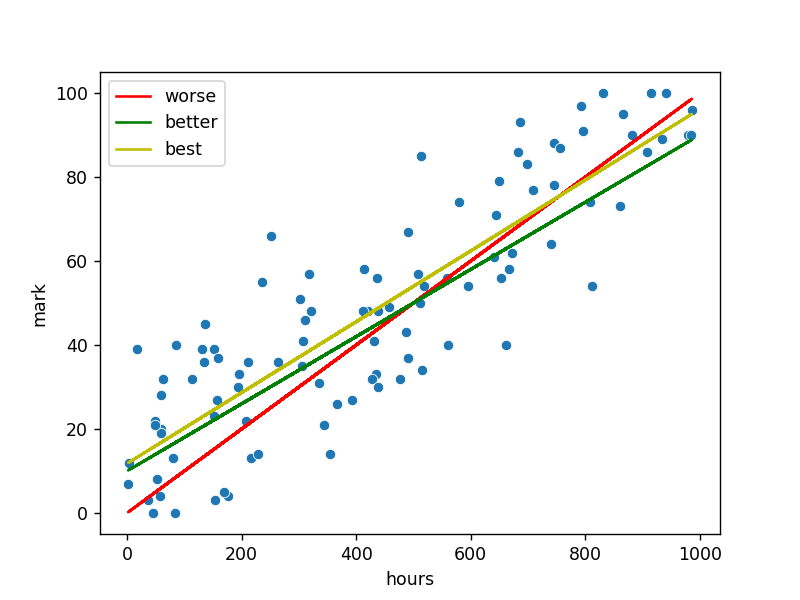

In [54]:
fig, ax = plt.subplots()
sns.scatterplot(x=data["hours"], y=data["mark"])

plt.plot(data.hours, data.prediction_1, color='r', label='worse')
plt.plot(data.hours, data.prediction_2, color='g', label='better')
plt.plot(data.hours, data.best_prediction, color='y', label='best')

plt.legend()

If we wanted to check if the model is better according to our second criteria, we just compute:

In [55]:
data["error_best_bis"] = (data.mark - data.best_prediction).abs() < 5

In [56]:
data.error_best_bis.sum()

28

### Understanding lr attributes / methods

In [58]:
data.head()

,hours,mark,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3,error_1_bis,error_2_bis,error_3_bis,best_prediction,best_prediction_error,error_best_bis
0,865,95,86.5,79.20,42.81,72.25,249.6400,2723.7961,False,False,False,84.77,104.6529,False
1,4,12,0.4,10.32,46.84,134.56,2.8224,1213.8256,False,True,False,12.12,0.0144,True
2,305,35,30.5,34.40,48.68,20.25,0.3600,187.1424,True,True,False,37.52,6.3504,True
3,437,56,43.7,44.96,45.07,151.29,121.8816,119.4649,False,False,False,48.65,54.0225,False
4,682,86,68.2,64.56,42.50,316.84,459.6736,1892.2500,False,False,False,69.33,277.8889,False


In [57]:
lr

LinearRegression()

In [61]:
# lets predict for 2 students
lr.predict(np.array([[450], [330]])).round(1)

array([49.8, 39.6])

In [63]:
# lets predict for whole training dataset
lr.predict(data[["hours"]])[:10].round(1)

array([84.8, 12.1, 37.5, 48.7, 69.3, 59. , 42.7, 84.4, 16.8, 55.2])

`score` returns the coefficient of determination  
In the case of Linear Regression, it is exactly the correlation squared

In [64]:
lr.score(
    X=data[["hours"]],
    y=data.mark
)

0.7518130774464549

In [65]:
data[["hours", "mark"]].corr() ** 2

,hours,mark
hours,1.000000,0.751813
mark,0.751813,1.000000


We can evaluate other metrics on our model

In [68]:
from sklearn.metrics import mean_absolute_error

In [66]:
data.head()

,hours,mark,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3,error_1_bis,error_2_bis,error_3_bis,best_prediction,best_prediction_error,error_best_bis
0,865,95,86.5,79.20,42.81,72.25,249.6400,2723.7961,False,False,False,84.77,104.6529,False
1,4,12,0.4,10.32,46.84,134.56,2.8224,1213.8256,False,True,False,12.12,0.0144,True
2,305,35,30.5,34.40,48.68,20.25,0.3600,187.1424,True,True,False,37.52,6.3504,True
3,437,56,43.7,44.96,45.07,151.29,121.8816,119.4649,False,False,False,48.65,54.0225,False
4,682,86,68.2,64.56,42.50,316.84,459.6736,1892.2500,False,False,False,69.33,277.8889,False


In [69]:
mean_absolute_error(data.mark, data.best_prediction)

11.4026

In [70]:
mean_absolute_error(data.mark, data.prediction_2)

11.894399999999997

## Align with business to decide the optimal metric!!

In [71]:
data2 = pd.DataFrame({
    "boxes": [100, 150, 160, 90, 220], 
    "pred_1": [105, 153, 172, 93, 244], 
    "pred_2": [98, 146, 166, 88, 214]
})

In [72]:
data2.head()

,boxes,pred_1,pred_2
0,100,105,98
1,150,153,146
2,160,172,166
3,90,93,88
4,220,244,214


In [73]:
data2["mse_1"] = (data2["boxes"] - data2["pred_1"]) ** 2
data2["mse_2"] = (data2["boxes"] - data2["pred_2"]) ** 2

In [74]:
data2.head()

,boxes,pred_1,pred_2,mse_1,mse_2
0,100,105,98,25,4
1,150,153,146,9,16
2,160,172,166,144,36
3,90,93,88,9,4
4,220,244,214,576,36


In [75]:
data2.mse_1.mean()

152.6

In [76]:
data2.mse_2.mean()

19.2

In [77]:
loss_demand = 3
# suppose we lose 1 of 2 clients if non-provided
loss_offer = 250

In [78]:
data2["loss_demand_1"] = (data2["pred_1"] - data2["boxes"]) * (data2["pred_1"] - data2["boxes"] > 0) * loss_demand

In [79]:
data2["loss_offer_1"] = (- data2["pred_1"] + data2["boxes"]) * (data2["pred_1"] - data2["boxes"] < 0) * loss_offer

In [80]:
data2["loss_demand_2"] = (data2["pred_2"] - data2["boxes"]) * (data2["pred_2"] - data2["boxes"] > 0) * loss_demand

In [81]:
data2["loss_offer_2"] = (- data2["pred_2"] + data2["boxes"]) * (data2["pred_2"] - data2["boxes"] < 0) * loss_offer

In [82]:
data2["loss_1"] = data2.loss_demand_1 + data2.loss_offer_1
data2["loss_2"] = data2.loss_demand_2 + data2.loss_offer_2

In [84]:
data2

,boxes,pred_1,pred_2,mse_1,mse_2,loss_demand_1,loss_offer_1,loss_demand_2,loss_offer_2,loss_1,loss_2
0,100,105,98,25,4,15,0,0,500,15,500
1,150,153,146,9,16,9,0,0,1000,9,1000
2,160,172,166,144,36,36,0,18,0,36,18
3,90,93,88,9,4,9,0,0,500,9,500
4,220,244,214,576,36,72,0,0,1500,72,1500


In [85]:
data2.loss_1.sum()

141

In [86]:
data2.loss_2.sum()

3518